<h1><font color="black">Project 1</font></h1>

<h4><font color="red">Note: All units are in base form of metric units. (e.g. meters, grams, seconds) Except for the falling ball with air resistance.</font></h4>

<h2><font color="black">1D Vertical Motion</font></h2>

<h3><font color="black">Ball Falling Due to Earth's Gravitational Force</font></h3>

<h4><font color="black">Perfectly Inelastic Collision</font></h4>

In [145]:
from vpython import* 
import numpy as np
import matplotlib.pyplot as plt

In [146]:
scene = canvas() 

<IPython.core.display.Javascript object>

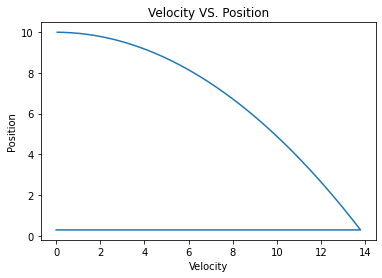

In [147]:
# Initialize all objects and variables
ball = sphere(pos=vector(0,10,0), radius=0.5, color=color.magenta)
wallD = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)
ball.velocity = vector(0,0,0)
scene.autoscale = False
#t = np.linspace(0, 5, num=100) # Set time as 'continous' parameter.
t = 0
deltat = 0.005
g = -9.81
vy1 = []
py1 = []

while t < 5:
    rate(100)
    # Updating velocity and position based off equations of motion
    ball.velocity.y = ball.velocity.y + g * deltat 
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    t = t + deltat
    # Get velocity at every point in time
    y = ball.velocity.y
    vy1.append(abs(y))
    # Get positions at every point in time
    p = ball.pos.y
    py1.append(abs(p)) 
    
    # Accounting for the collision then break
    if ball.pos.y < wallD.pos.y + 0.3:
        # Updating velocity and position based off equations of motion
        ball.velocity.y = 0
        ball.pos.y = ball.pos.y + ball.velocity.y * deltat
        # Get velocity at every point in time
        y = ball.velocity.y 
        vy1.append(abs(y)) 
        # Get positions at every point in time
        p = ball.pos.y
        py1.append(abs(p))
        break

# Plot every point of velocity and position, velocity increases as position decreases
plt.plot(vy1,py1)
plt.xlabel("Velocity")
plt.ylabel("Position")
plt.title("Velocity VS. Position")
# Show data on one graphic
plt.show()

In [148]:
scene = canvas() 

<IPython.core.display.Javascript object>

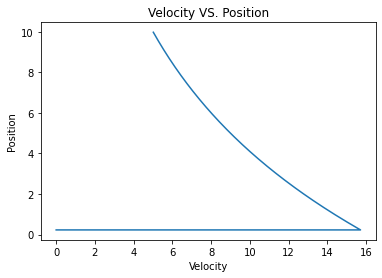

In [149]:
# Initialize all objects and variables
ball = sphere(pos=vector(0,10,0), radius=0.5, mass = 2, color=color.magenta)
wallD = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)
ball.velocity = vector(0,-5,0)
scene.autoscale = False
# Drag coefficient, projectile radius (m), area (m^2) and mass (kg)
c = 0.47
A = pi * ball.radius**2
# Air density (kg*m^3), acceleration due to gravity (m*s^2)
rho_air = 1.28
# Define constant for convenience
k = 0.5 * c * rho_air * A
Fg = ball.mass*g
t = 0
deltat = 0.005
g = -9.81
# Initialize arrays
vy2 = []
py2 = []

while t < 5:
    rate(100)
    # Adjusting acceleration based on drag
    Fd = k*(ball.velocity.y**2)
    a = Fd/ball.mass
    # Updating velocity and position based off equations of motion
    ball.velocity.y = ball.velocity.y - a * deltat 
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat 
    t = t + deltat
    
    y = ball.velocity.y # get positions at every point in time
    vy2.append(abs(y)) 
    p = ball.pos.y # get positions at every point in time
    py2.append(abs(p)) 
    
    if ball.pos.y < wallD.pos.y + 0.3:
        # Updating velocity and position based off equations of motion
        ball.velocity.y = 0
        ball.pos.y = ball.pos.y + ball.velocity.y * deltat
        # Get velocity at every point in time
        y = ball.velocity.y 
        vy2.append(abs(y)) 
        # Get positions at every point in time
        p = ball.pos.y
        py2.append(abs(p))
        break
        
# Plot every point of velocity and position, velocity increases as position decreases
plt.plot(vy2,py2)
plt.xlabel("Velocity")
plt.ylabel("Position")
plt.title("Velocity VS. Position")
# Show data on one graphic
plt.show()

<h3><font color="black">Ball Bouncing on Ground</font></h3>

<h4><font color="black">Elastic Collision</font></h4>

In [150]:
scene = canvas() 

<IPython.core.display.Javascript object>

In [151]:
# Initialize all objects and variables
ball = sphere(pos=vector(0,10,0), radius=0.5, color=color.magenta, make_trail=True, retain=25)
wallD = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)
ball.velocity = vector(0,0,0)
vscale = 0.25
varr = arrow(pos=ball.pos, axis=vscale*ball.velocity, color=color.cyan)
scene.autoscale = False
t = 0 
deltat = 0.005
g = -9.81
    
while t < 10:
    rate(100)
    # Updating velocity and position based off equations of motion
    ball.velocity.y = ball.velocity.y + g * deltat 
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat
    t = t + deltat
    
    # Print the velocity to console before and after collision to show no loss of energy
    if ball.pos.y < wallD.pos.y + 0.3:
        print("Velocity of ball before contact = ", ball.velocity.y)
        ball.velocity.y = -ball.velocity.y
        print("Velocity of ball after contact = ", ball.velocity.y)
        
    varr.pos = ball.pos
    varr.axis = vscale*ball.velocity

Velocity of ball before contact =  -13.78304999999994
Velocity of ball after contact =  13.78304999999994
Velocity of ball before contact =  -13.733999999999943
Velocity of ball after contact =  13.733999999999943
Velocity of ball before contact =  -13.684949999999942
Velocity of ball after contact =  13.684949999999942
Velocity of ball before contact =  -13.635899999999944
Velocity of ball after contact =  13.635899999999944


<h4><font color="black">Inelastic Collision</font></h4>

In [152]:
scene = canvas()

<IPython.core.display.Javascript object>

In [153]:
# Initializing objects
# Assume the mass of the ball is similiar to a tennis ball (approximately 60g)
ball = sphere(pos=vector(0,10,0), radius=0.5, mass = 60, color=color.magenta, make_trail=True, retain=50)
# Assuming we lose %10 of the ball's energy on every collision, the mass of the ground will be approximately 500g
# Let's assume that a slab of concrete occupying 0.003696 m^2 weighs around this much (this is the area of a tennis ball)
wallD = box(pos=vector(0,0,0), size=vector(12,0.2,12), mass = 500, color=color.green)
ball.velocity = vector(0,0,0)
vscale = 0.25
varr = arrow(pos=ball.pos, axis=vscale*ball.velocity, color=color.cyan)
scene.autoscale = False
t = 0 
deltat = 0.005
# Gravity is initialized
g = -9.81
    
while t < 100:
    rate(100)
    # Updating velocity and position based off equations of motion
    ball.velocity.y = ball.velocity.y + g * deltat 
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat 
    KE = 0.5*ball.mass*(ball.velocity.y**2)
    # Approximately %10 of the ball's energy is lost per collision, we will round here to make the simulation smoother
    Elost = round((wallD.mass/(wallD.mass+ball.mass)),1)
    t = t + deltat

    # Print the velocity to console before and after collision to show a loss of energy (due to heat, sound, etc.)
    if ball.pos.y < wallD.pos.y + 0.3:
        print("Velocity of ball before contact = ", ball.velocity.y)
        ball.velocity.y = -Elost*ball.velocity.y
        print("Velocity of ball after contact = ", ball.velocity.y)
    
    # Convenient number to use in order to break out of this while loop
    if round(ball.velocity.y,4) == 0.0232:
        break
        
    varr.pos = ball.pos
    varr.axis = vscale*ball.velocity

Velocity of ball before contact =  -13.78304999999994
Velocity of ball after contact =  12.404744999999947
Velocity of ball before contact =  -12.36550499999997
Velocity of ball after contact =  11.128954499999974
Velocity of ball before contact =  -11.090695499999976
Velocity of ball after contact =  9.981625949999978
Velocity of ball before contact =  -9.932674050000001
Velocity of ball after contact =  8.939406645000002
Velocity of ball before contact =  -8.865743355000005
Velocity of ball after contact =  7.979169019500004
Velocity of ball before contact =  -7.913030980500025
Velocity of ball after contact =  7.121727882450023
Velocity of ball before contact =  -7.102772117549997
Velocity of ball after contact =  6.392494905794997
Velocity of ball before contact =  -6.311455094205015
Velocity of ball after contact =  5.6803095847845135
Velocity of ball before contact =  -5.6502404152154915
Velocity of ball after contact =  5.085216373693942
Velocity of ball before contact =  -5.019

Velocity of ball before contact =  -0.02636032298620304
Velocity of ball after contact =  0.02372429068758274
Velocity of ball before contact =  -0.025325709312417264
Velocity of ball after contact =  0.022793138381175537
Velocity of ball before contact =  -0.026256861618824467
Velocity of ball after contact =  0.02363117545694202
Velocity of ball before contact =  -0.025418824543057984
Velocity of ball after contact =  0.022876942088752187
Velocity of ball before contact =  -0.026173057911247816
Velocity of ball after contact =  0.023555752120123036
Velocity of ball before contact =  -0.025494247879876968
Velocity of ball after contact =  0.02294482309188927
Velocity of ball before contact =  -0.026105176908110733
Velocity of ball after contact =  0.023494659217299662
Velocity of ball before contact =  -0.02555534078270034
Velocity of ball after contact =  0.022999806704430307
Velocity of ball before contact =  -0.026050193295569696
Velocity of ball after contact =  0.0234451739660127

<h2><font color="black">2D Projectile Motion</font></h2>

<h3><font color="black">Ball Shot Out of Cannon</font></h3>

In [154]:
scene = canvas() 

<IPython.core.display.Javascript object>

<h3><font color="red">This is my Blobfish</font></h3>

In [155]:
# The cannon is a cylinder object, the ball and cannon are poisitioned in a view favorable to the frame of reference
cannon = cylinder(pos=vector(-62,0,0), axis=vector(7,7,0), radius=1)
ball = sphere(pos=vector(-60,3,0), radius=0.5, color=color.magenta, make_trail=True)
obstacle1 = sphere(pos=vector(-30,10,0), radius=5, color=color.magenta, make_trail=True)
obstacle2 = sphere(pos=vector(40,10,0), radius=5, color=color.magenta, make_trail=True)
obstacle3 = cylinder(pos=vector(5,-20,0), axis=vector(0,0,10), radius=10)
obstacle4 = curve(vector(-50,-50,0), vector(5, -40, 0), vector(60,-50,0), radius=3, color=color.red)
wallD = box(pos=vector(0,0,0), size=vector(100,0.6,100), color=color.green)

# An arbitrary initial velocity is given, theta is chosen for it's symmetry
v0 = 25
theta = pi/4
# The ball's velocity components are determined from the initial velocity, trigonometric functions, and theta
ball.velocity = vector(v0*cos(theta),v0*sin(theta),0)
vscale = 0.25
varr = arrow(pos=ball.pos, axis=vscale*ball.velocity, color=color.cyan)
scene.autoscale = False
t = 0 
deltat = 0.005
# Gravity is initialized and count is used to break out of the while loop at a specific instance
g = -9.81
count = 0

while t < 10:
    rate(100)
    # The x-component of velocity maintains a linear form while the y-component takes a parabolic form
    ball.pos.x = ball.pos.x + ball.velocity.x * deltat
    ball.pos.y = ball.pos.y + ball.velocity.y * deltat - (1/2)*g*(deltat**2)
    ball.velocity.y = ball.velocity.y + g*deltat
    t = t + deltat
    
    # The collision will remain elastic in this case, because this Blobfish needs a symmetric outline for it's eyes
    if ball.pos.y < wallD.pos.y + 0.3:
        ball.velocity.y = -ball.velocity.y
        count += 1
    
    # Breaking out of this while loop when the ball and ground have their second collision
    if count == 2:
        break
        
    # Updating familiar arrow objects
    varr.pos = ball.pos
    varr.axis = vscale*ball.velocity

<h2><font color="black">Analysis</font></h2>

<h4><font color="black">The simulation works as intended. Firstly, a ball falls to to "Earth's" gravitaional force with and without air resistance. The plots were consistent with the simulation. Secondly, a ball bounces in an elastic and inelastic collision. The velocity before and after the collision reflected energy conservation and the lack thereof. Lastly, simulating projectile motion with the proper equations of motion yielded a parabolic trajectory as expected.</font></h4>